# Import Necessary Library

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Scaling and Splitting
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

# Modelling
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import tensorflow as tf

# Evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Data Loading and Preprocessing

In [21]:

df = pd.read_csv(r'D:\Git hub projects\Breast Cancer\Breast_Cancer.csv')
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [22]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [23]:
df.isnull().sum() 

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [24]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


# Exploratory Data Analysis [EDA]

In [25]:
def countDensityGraph(text):
    plt.figure(figsize = (10,7))
    sns.histplot(df[text], bins = 40, color = "darkblue", alpha = 0.6)
    plt.yticks(rotation = 45)
    title = 'Count Density: ' + text
    plt.title(title)
    plt.show()

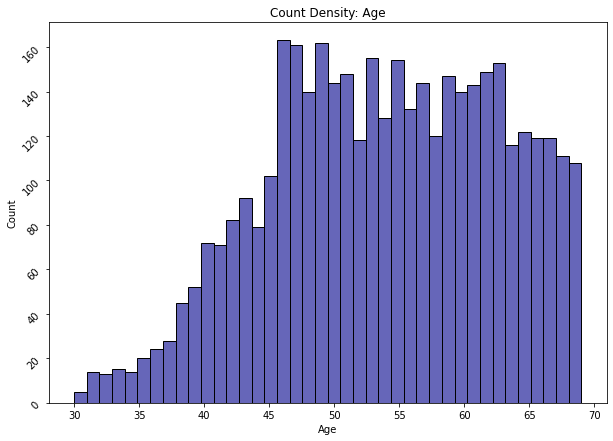

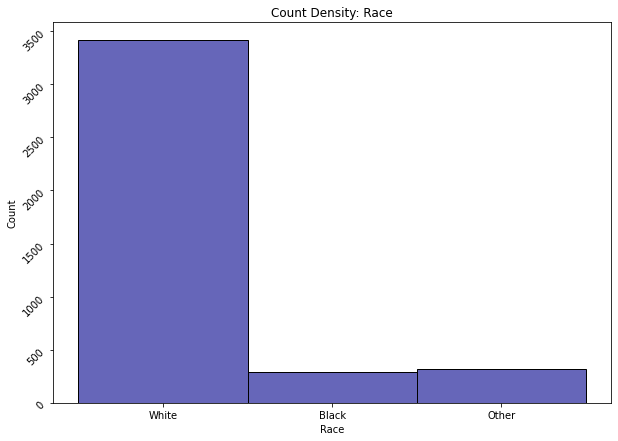

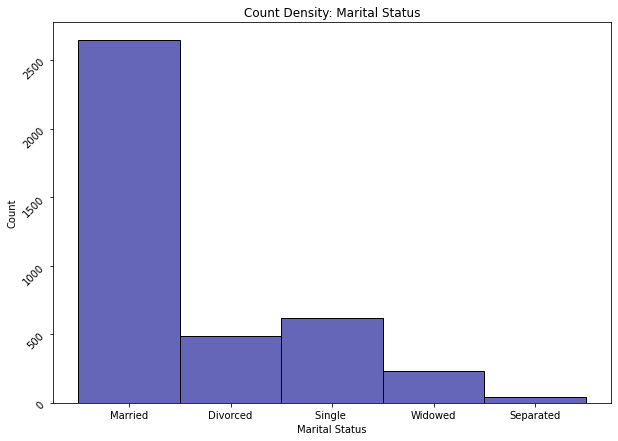

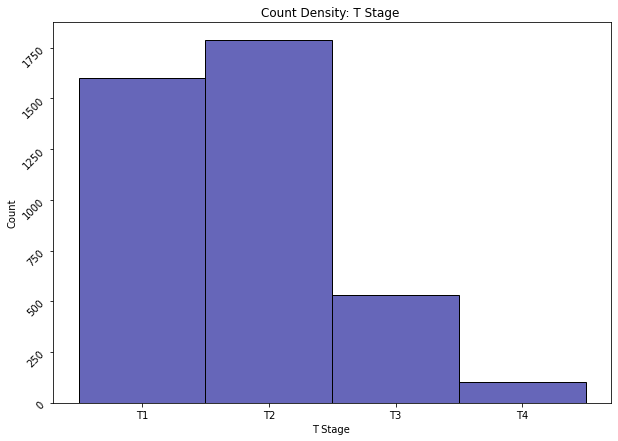

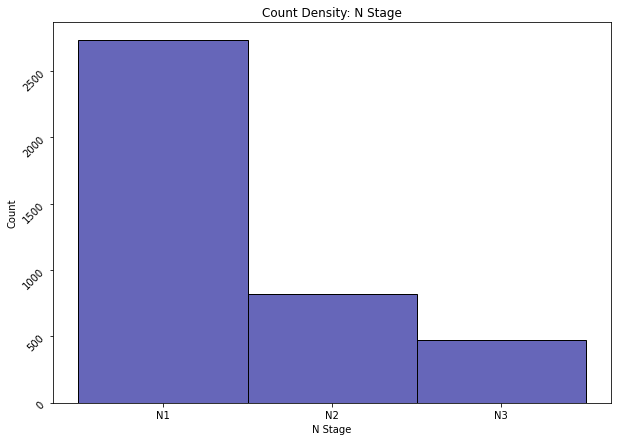

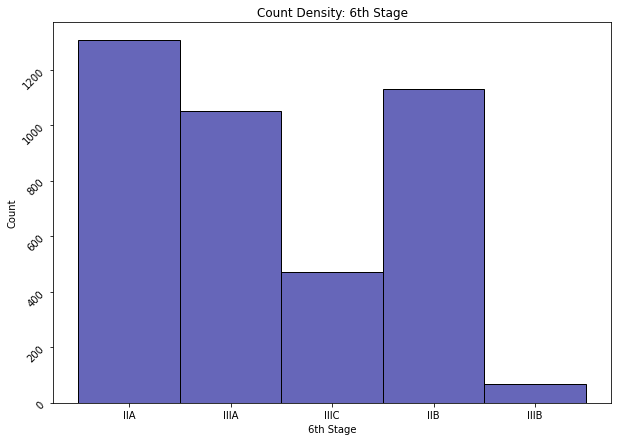

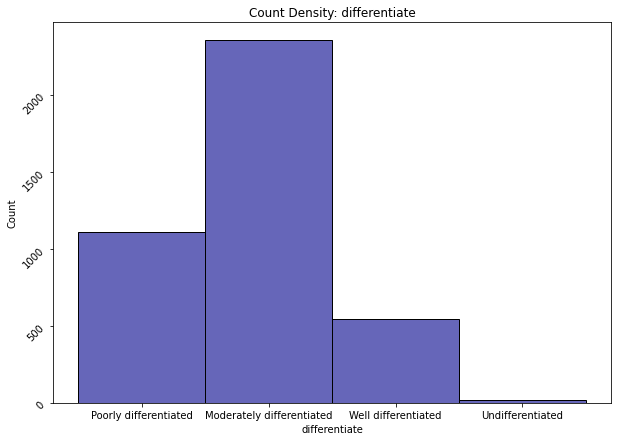

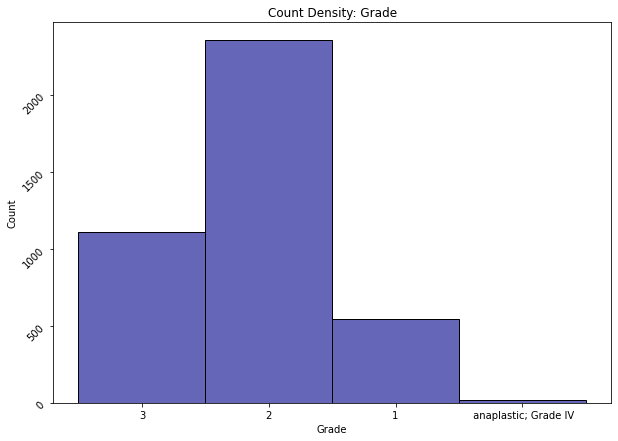

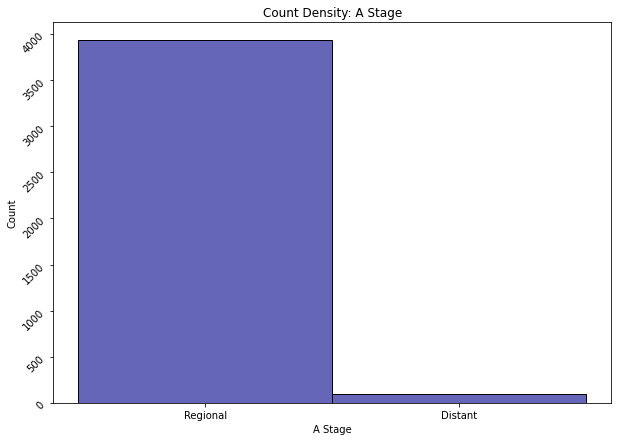

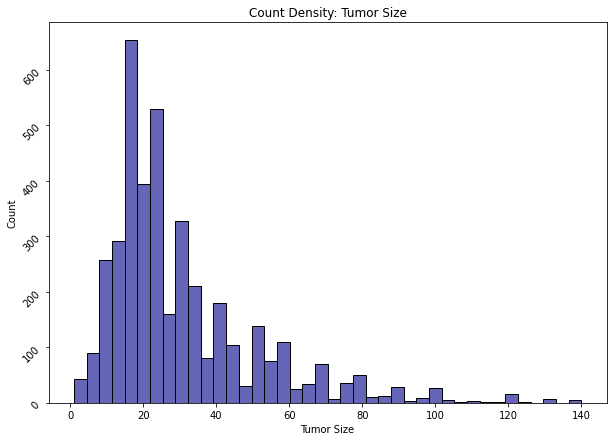

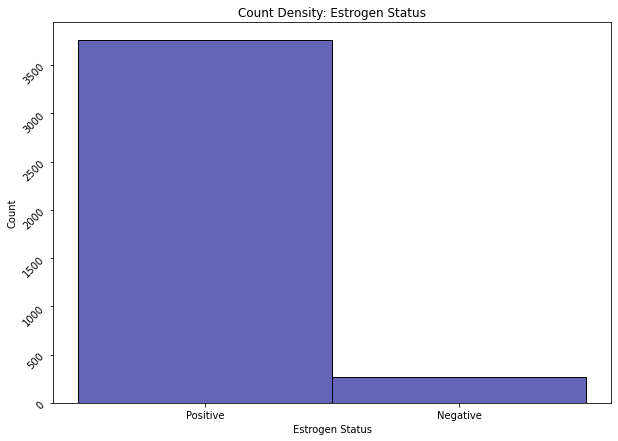

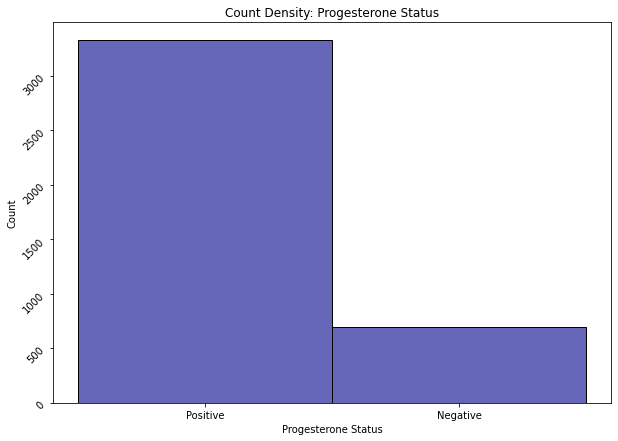

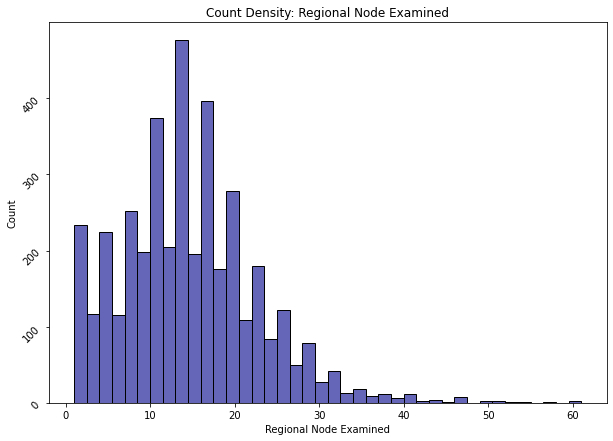

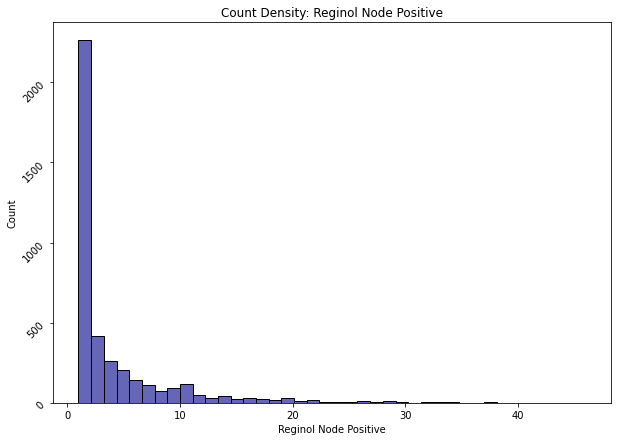

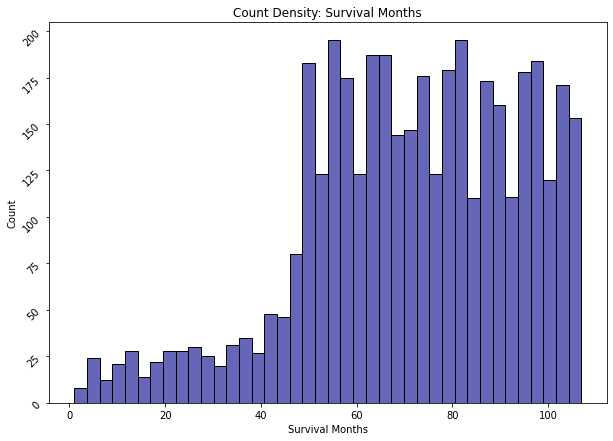

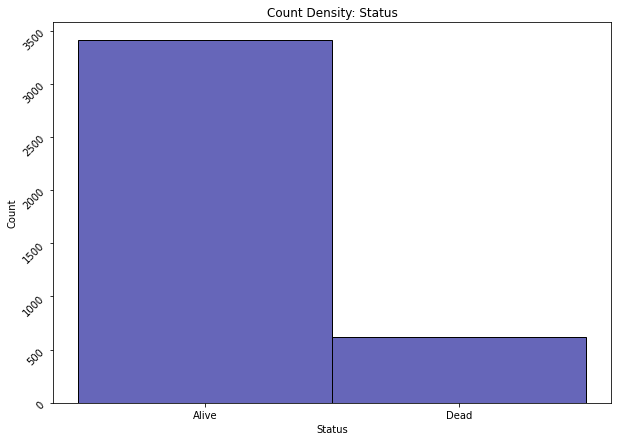

In [26]:
columnsCountDensity = df.columns
for i in columnsCountDensity:
    countDensityGraph(i)

# Correlation Heatmap

In [27]:
encoder = LabelEncoder()
def encodeColumn(parameter):
    df[parameter] = encoder.fit_transform(df[parameter])
listColumn = ['Race','Marital Status','T Stage ','N Stage','6th Stage','differentiate','Grade','A Stage','Estrogen Status','Progesterone Status','Status']
for i in listColumn:
    encodeColumn(i)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     4024 non-null   int64
 1   Race                    4024 non-null   int32
 2   Marital Status          4024 non-null   int32
 3   T Stage                 4024 non-null   int32
 4   N Stage                 4024 non-null   int32
 5   6th Stage               4024 non-null   int32
 6   differentiate           4024 non-null   int32
 7   Grade                   4024 non-null   int32
 8   A Stage                 4024 non-null   int32
 9   Tumor Size              4024 non-null   int64
 10  Estrogen Status         4024 non-null   int32
 11  Progesterone Status     4024 non-null   int32
 12  Regional Node Examined  4024 non-null   int64
 13  Reginol Node Positive   4024 non-null   int64
 14  Survival Months         4024 non-null   int64
 15  Status               

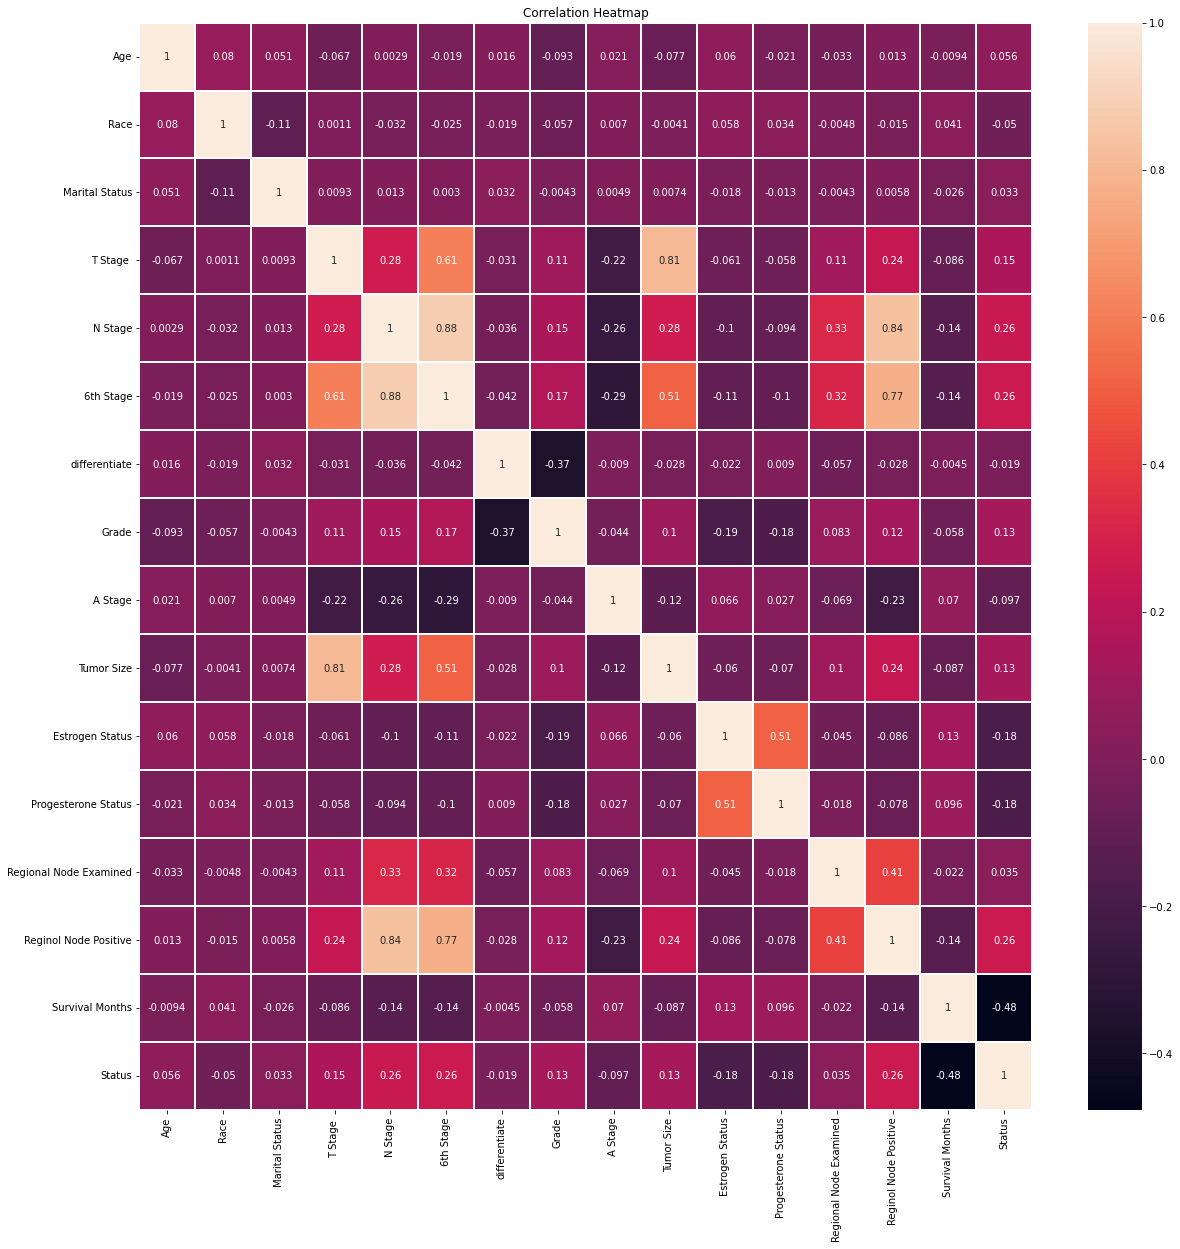

In [28]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot=True, cmap = 'rocket', linewidth = 0.01)
plt.title("Correlation Heatmap")
plt.show()

In [29]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,2,1,0,0,0,1,3,1,4,1,1,24,1,60,0
1,50,2,1,1,1,2,0,2,1,35,1,1,14,5,62,0
2,58,2,0,2,2,4,0,2,1,63,1,1,14,7,75,0
3,58,2,1,0,0,0,1,3,1,18,1,1,2,1,84,0
4,47,2,1,1,0,1,1,3,1,41,1,1,3,1,50,0


In [30]:
x=df.drop(['Status'], axis=1)
y=df['Status']

In [31]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
x = norm.fit_transform(x)
print(x)

[[0.97435897 1.         0.25       ... 0.38333333 0.         0.55660377]
 [0.51282051 1.         0.25       ... 0.21666667 0.08888889 0.5754717 ]
 [0.71794872 1.         0.         ... 0.21666667 0.13333333 0.69811321]
 ...
 [0.97435897 1.         0.25       ... 0.16666667 0.04444444 0.64150943]
 [0.71794872 0.         0.         ... 0.16666667 0.         0.66981132]
 [0.41025641 1.         0.25       ... 0.1        0.02222222 0.93396226]]


# spliting data

In [32]:
from sklearn.model_selection import train_test_split
(x_train, x_test, y_train, y_test)=train_test_split(x,y,test_size=0.2)

# try models
#machine learning models

In [33]:
model1 = DecisionTreeClassifier()
model1.fit(x_train,y_train)
y_pred1 = model1.predict(x_test)
conf1 = confusion_matrix(y_test, y_pred1)
print(conf1)

[[588  94]
 [ 63  60]]


In [34]:
model2 = RandomForestClassifier()
model2.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)
conf2 = confusion_matrix(y_test, y_pred2)
print(conf2)

[[668  14]
 [ 67  56]]


In [35]:
model3 = GaussianNB()
model3.fit(x_train,y_train)
y_pred3 = model3.predict(x_test)
conf3 = confusion_matrix(y_test, y_pred3)
print(conf3)

[[588  94]
 [ 62  61]]


In [36]:
model4 = XGBClassifier()
model4.fit(x_train,y_train)
y_pred4 = model4.predict(x_test)
conf4 = confusion_matrix(y_test, y_pred4)
print(conf4)

[[659  23]
 [ 63  60]]


# deeplearning (ANN)

In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
input_shape = [x_train.shape[1]]
model5 = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])
model5.summary()
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 15)                60        
_________________________________________________________________
dense (Dense)                (None, 256)               4096      
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0